### <center><b> CISB123 Text Analytics </b><center>

### <center><b> Lab 6 Exercise - Text Classifier </b><center>

### Name: Maizatul Aufa binti Zamidi (SW01082394)

In [74]:
# Perform imports and load the dataset: 
import pandas as pd 
df = pd.read_csv("Processed_Reviews_Label.csv",encoding="ISO-8859-1") 
df.shape

(13, 15)

In [76]:
df.head()

,Review,lowercased,urls_removed,html_removed,emojis_removed,slangs_replaced,contractions_replaced,punctuations_removed,numbers_removed,spelling_corrected,stopwords_removed,stemmed_words,lemmatized,Label,tokenized
0,The product arrived on time. Packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,product arrived time packaging great quality a...,product arriv time packag great qualiti amaz,product arrive time packaging great quality am...,1,"['product', 'arrive', 'time', 'packaging', 'gr..."
1,THIS PRODUCT IS JUST AMAZING! I LOVE IT.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing i love it,this product is just amazing i love it,this product is just amazing i love it,product amazing love,product amaz love,product amaze love,1,"['product', 'amaze', 'love']"
2,"I bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...",i bought this phone for 799 and it has a 120hz...,i bought this phone for and it has a hz displ...,i bought this phone for and it has a hz displ...,bought phone hz display totally worth,bought phone hz display total worth,buy phone hz display totally worth,1,"['buy', 'phone', 'hz', 'display', 'totally', '..."
3,Wow!!! This product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow product awesome bit expensive,wow product awesom bit expens,wow product awesome bit expensive,0,"['wow', 'product', 'awesome', 'bit', 'expensive']"
4,The laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine,the laptop works perfectly fine,the laptop works perfectly fine,laptop works perfectly fine,laptop work perfectli fine,laptop work perfectly fine,1,"['laptop', 'work', 'perfectly', 'fine']"


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Review                 13 non-null     object
 1   lowercased             13 non-null     object
 2   urls_removed           13 non-null     object
 3   html_removed           13 non-null     object
 4   emojis_removed         13 non-null     object
 5   slangs_replaced        13 non-null     object
 6   contractions_replaced  13 non-null     object
 7   punctuations_removed   13 non-null     object
 8   numbers_removed        13 non-null     object
 9   spelling_corrected     13 non-null     object
 10  stopwords_removed      13 non-null     object
 11  stemmed_words          13 non-null     object
 12  lemmatized             13 non-null     object
 13  Label                  13 non-null     int64 
 14  tokenized              13 non-null     object
dtypes: int64(1), object(14)
m

In [80]:
df.columns, df[['lemmatized']].head()

(Index(['Review', 'lowercased', 'urls_removed', 'html_removed',
        'emojis_removed', 'slangs_replaced', 'contractions_replaced',
        'punctuations_removed', 'numbers_removed', 'spelling_corrected',
        'stopwords_removed', 'stemmed_words', 'lemmatized', 'Label',
        'tokenized'],
       dtype='object'),
                                           lemmatized
 0  product arrive time packaging great quality am...
 1                                 product amaze love
 2                 buy phone hz display totally worth
 3                  wow product awesome bit expensive
 4                         laptop work perfectly fine)

In [84]:
X_text = df['lemmatized']

In [88]:
df['Label']= pd.to_numeric(df['Label'], errors='coerce')

In [92]:
df = df.dropna(subset=['lemmatized', 'Label'])

In [94]:
y = df['Label'].astype(int)

In [96]:
print(X_text.head())
print(y.head())

0    product arrive time packaging great quality am...
1                                   product amaze love
2                   buy phone hz display totally worth
3                    wow product awesome bit expensive
4                           laptop work perfectly fine
Name: lemmatized, dtype: object
0    1
1    1
2    1
3    0
4    1
Name: Label, dtype: int32


#### VECTORIZATION

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vect = TfidfVectorizer() 
 
X = tfidf_vect.fit_transform(X_text) 

#### Model Training

In [102]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

In [104]:
# Step 1: Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [110]:
# 2. Train SVM model
svm_model = SVC(kernel='linear')  # Use linear kernel for text classification
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

#### Performance Evaluation

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

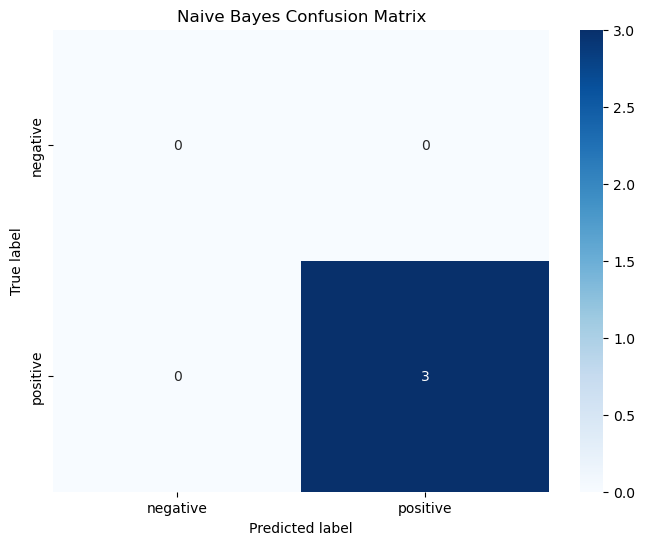

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Naive Bayes Error Rate: 0.00


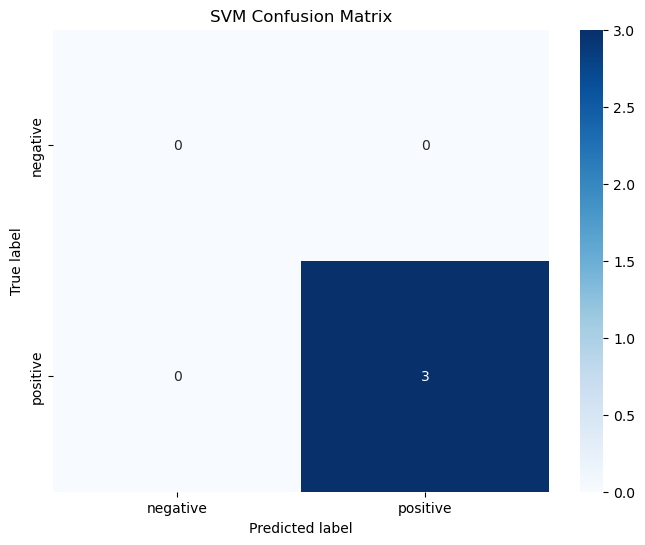


SVM Classifier Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


SVM Error Rate: 0.00


In [125]:
# Re-run the predictions if needed
nb_predicted = nb_model.predict(X_test)
svm_predicted = svm_model.predict(X_test)

# Re-calculate metrics for both classifiers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Naive Bayes metrics
nb_report = classification_report(y_test, nb_predicted)
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted, labels=[0, 1])

# SVM metrics
svm_report = classification_report(y_test, svm_predicted)
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted, labels=[0, 1])

# Function to plot confusion matrix (referenced from your Jupyter code)
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot and print for Naive Bayes
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')
print("Naive Bayes Classifier Report:")
print(nb_report)
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}")

# Plot and print for SVM
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')
print("\nSVM Classifier Report:")
print(svm_report)
print(f"\nSVM Error Rate: {svm_error_rate:.2f}")
